In [3]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(initial, test_function_no):
    x = initial

    if test_function_no == 1:
        o = 10 * -np.cos(2 * (x[0]**2 + x[1]**2)**0.5) * \
            np.exp(-0.5 * ((x[0] + 1)**2 + (x[1] - 1)**2)**0.5) + 5.1
    elif test_function_no == 2:
        o = -np.sum(np.abs(np.array([x[0], x[1]]))) + 8.5
    elif test_function_no == 3:
        o = -1 * (0.2 + x[0]**2 + x[1]**2 - 0.1 * np.cos(6 * np.pi * x[0]) -
                 0.1 * np.cos(6 * np.pi * x[1]))
    elif test_function_no == 4:
        o = -1 * np.sum(np.array(x)**2)
    else:
        raise ValueError("Invalid test_function_no")

    return o


def get_neighbours(A, step_size, ub, lb, test_function_no):
    n_var = len(A['position'])
    neighbours = []

    for idx in range(1, 5):
        if idx == 1:
            step_vector = [step_size[0], 0]
        elif idx == 2:
            step_vector = [0, step_size[1]]
        elif idx == 3:
            step_vector = [-step_size[0], 0]
        elif idx == 4:
            step_vector = [0, -step_size[1]]

        new_position = np.array(A['position']) + np.array(step_vector)

        for i in range(n_var):
            if new_position[i] > ub[i]:
                new_position[i] = ub[i]
            if new_position[i] < lb[i]:
                new_position[i] = lb[i]

        new_cost = objective_function(new_position, test_function_no)
        neighbours.append({'position': new_position, 'cost': new_cost})

    return neighbours

#### base logic of how one agent will give one solution
#### run multiple agents/iterations with different initial start point to potentially find the global optimum

In [4]:
test_function_no = 3  # choose the test function

initial = [0.8, -0.5]
cost_initial = objective_function(initial, test_function_no)

ub = [1, 1]
lb = [-1, -1]

step_size = [0.05, 0.05]


n_var = len(initial)
optimum_found = False
A = {'position': initial, 'cost': objective_function(initial, test_function_no)}
trajectory = []

iteration = 0
while not optimum_found:
    neighbours = get_neighbours(A, step_size, ub, lb, test_function_no)

    iteration += 1
    trajectory.append({'position': A['position'], 'cost': A['cost']})

    improvement = False
    for k in range(len(neighbours)):
        B = neighbours[k]
        if B['cost'] > A['cost']:
            A = {'position': B['position'], 'cost': B['cost']}
            improvement = True

    if not improvement:
        optimum_found = True

print('Best solution obtained by Hill Climbing:' , A)
for point in trajectory:
    print(point)


Best solution obtained by Hill Climbing: {'position': array([ 0.65, -0.3 ]), 'cost': -0.5364926489329899}
{'position': [0.8, -0.5], 'cost': -1.2709016994374949}
{'position': array([ 0.75, -0.5 ]), 'cost': -1.1125}
{'position': array([ 0.7, -0.5]), 'cost': -0.9590983005625051}
{'position': array([ 0.7 , -0.45]), 'cost': -0.8703768257917525}
{'position': array([ 0.7, -0.4]), 'cost': -0.7381966011250104}
{'position': array([ 0.7 , -0.35]), 'cost': -0.6364926489329898}
{'position': array([ 0.65, -0.35]), 'cost': -0.5547886967409693}
{'position': array([ 0.65, -0.3 ]), 'cost': -0.5364926489329899}


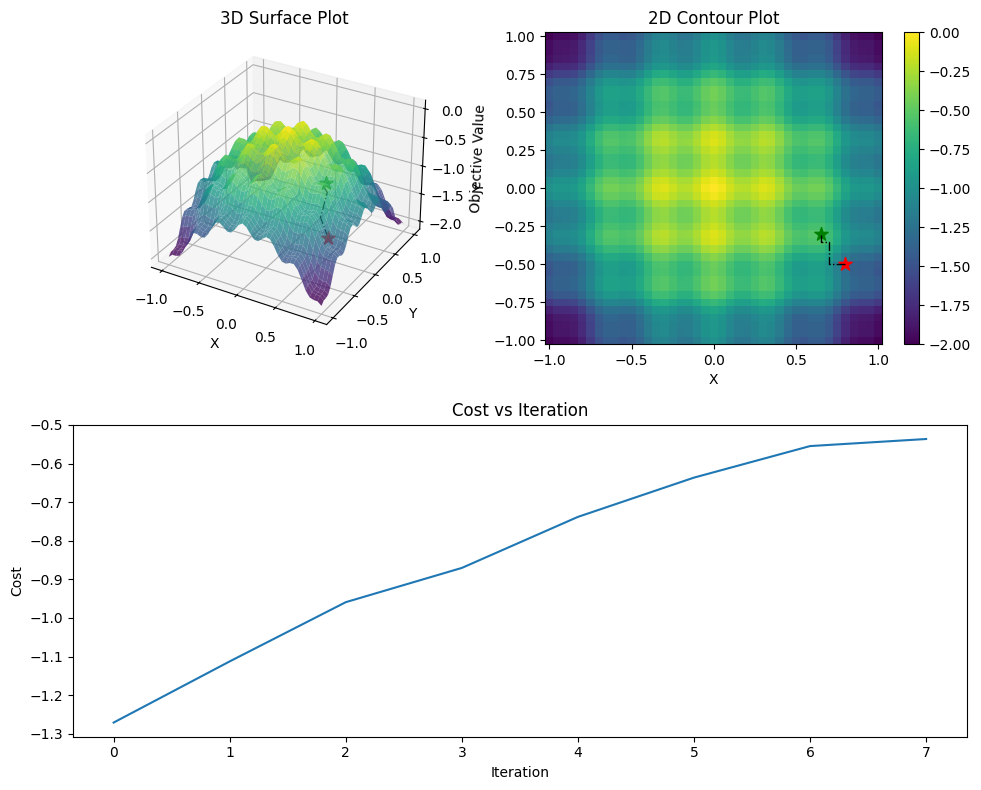

In [6]:
ub = [1, 1]
lb = [-1, -1]

step_size = [0.05, 0.05]

# trajectory = hill_climbing(initial, test_function_no, ub, lb, step_size)

# Plotting
x = np.arange(lb[0], ub[0] + step_size[0], step_size[0])
y = np.arange(lb[1], ub[1] + step_size[1], step_size[1])
x_new, y_new = np.meshgrid(x, y)

z_new = np.zeros_like(x_new)
for i in range(len(x)):
    for j in range(len(y)):
        X = [x_new[i, j], y_new[i, j]]
        z_new[i, j] = objective_function(X, test_function_no)

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(x_new, y_new, z_new, cmap='viridis', alpha=0.8)
ax1.plot([point['position'][0] for point in trajectory], 
            [point['position'][1] for point in trajectory], 
            [point['cost'] for point in trajectory], '-.k', linewidth=1)
ax1.scatter(trajectory[0]['position'][0], trajectory[0]['position'][1], 
            trajectory[0]['cost'], marker='*', color='r', s=100, label='Start')
ax1.scatter(trajectory[-1]['position'][0], trajectory[-1]['position'][1], 
            trajectory[-1]['cost'], marker='*', color='g', s=100, label='End')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Objective Value')
ax1.set_title('3D Surface Plot')

ax2 = fig.add_subplot(2, 2, 2)
c = ax2.pcolormesh(x_new, y_new, z_new, cmap='viridis')
fig.colorbar(c)
ax2.plot([point['position'][0] for point in trajectory], 
            [point['position'][1] for point in trajectory], '-.k', linewidth=1)
ax2.scatter(trajectory[0]['position'][0], trajectory[0]['position'][1], marker='*', color='r', s=100)
ax2.scatter(trajectory[-1]['position'][0], trajectory[-1]['position'][1], marker='*', color='g', s=100)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('2D Contour Plot')

ax3 = fig.add_subplot(2, 2, (3, 4))
ax3.plot([point['cost'] for point in trajectory])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Cost')
ax3.set_title('Cost vs Iteration')

plt.tight_layout()
plt.show()